In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import scipy

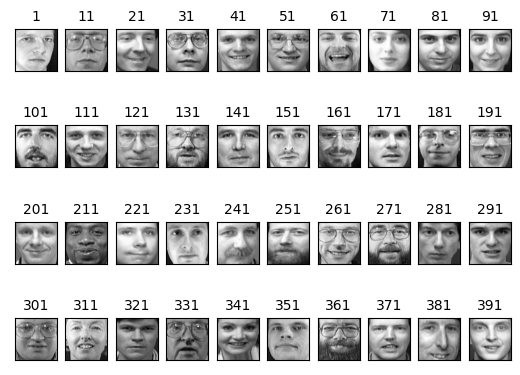

<Figure size 4000x4000 with 0 Axes>

In [2]:
X, y = fetch_olivetti_faces(return_X_y=True)
# X
# plt.imshow(X[1].reshape(64,64), cmap="gray")
for i in range(1,401, 10):
    
    plt.subplot(4, 10, (i//10)+1)

    plt.imshow(X[i].reshape(64,64), cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(str(i), fontdict={"fontsize": 10})
plt.figure(figsize=(40,40)) 
plt.tight_layout()
plt.show()

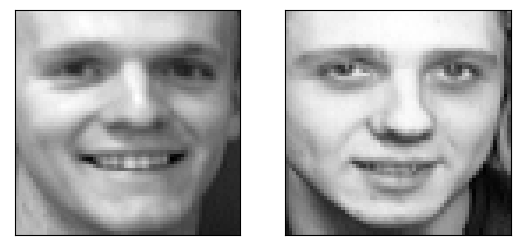

In [3]:
plt.subplot(1, 2, 1)
plt.imshow(X[42].reshape(64,64), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(X[117].reshape(64,64), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()


In [49]:
class FisherLDA:
    def __init__(self, X, y, number_of_class):
        self.X = X
        self.y = y
        self.num_class = number_of_class
        
    def find_mus(self):
        mus = []
        for i in range(self.num_class):
            x_s = self.X[np.where(self.y == i)]
            mus.append(x_s.mean(axis=0))
        return np.array(mus)

    def fisher_lda(self):
        mus = self.find_mus()
        n = self.X.shape[0]
        self.s_w = (self.X - mus[self.y]).T @ (self.X - mus[self.y])
        overall_mean = self.X.mean(axis=0)
        self.s_b = 10 * ((mus-overall_mean).T @ (mus-overall_mean))
        self.vs = []
        # self.s_w =  (self.s_w + self.s_w.T) / 2
        # self.s_b =  (self.s_b + self.s_b.T) / 2

        self.s_w [abs(self.s_w) <=  5e-1] = 0
        matrix = np.linalg.inv(self.s_w) @ self.s_b
        matrix = (matrix + matrix.T) / 2
        # self.w, self.v = scipy.linalg.eig(a=self.s_b, b=self.s_w)
        self.w, self.v = np.linalg.eig(matrix)
        # self.w, self.v = self.w.real, self.v.real

    def find_andplot_thresholds(self):
        mus = self.find_mus()
        n = self.X.shape[0]
        self.s_w = (self.X - mus[self.y]).T @ (self.X - mus[self.y])
        overall_mean = self.X.mean(axis=0)
        for i in [1e-04, 1e-03, 1e-02]:
            self.s_w [abs(self.s_w) <=  i] = 0
            # self.s_w = self.s_w + 10
            matrix = np.linalg.inv(self.s_w) @ self.s_b
            matrix = (matrix + matrix.T) / 2
            w, v = np.linalg.eig(matrix)
            self.vs.append([w, v])
        for i in range(20):
            for j in range(3):
                plt.subplot(1,3, j+1)
                plt.imshow(self.vs[j][1][:,i].reshape(64,64), cmap="gray")
            plt.show()


In [50]:
lda = FisherLDA(X, y, 40)

In [51]:
lda.fisher_lda()

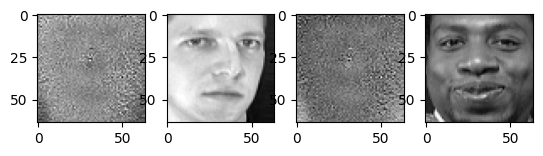

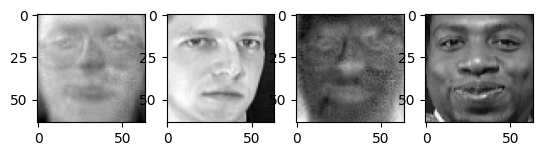

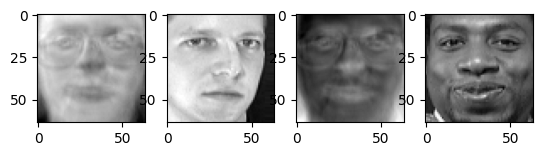

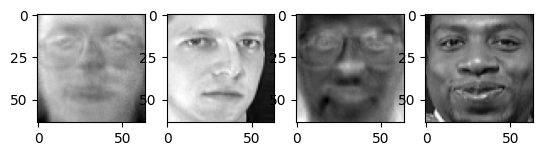

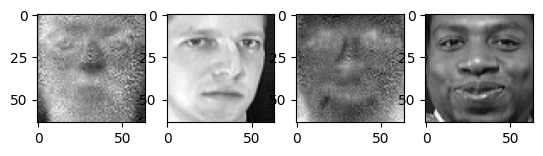

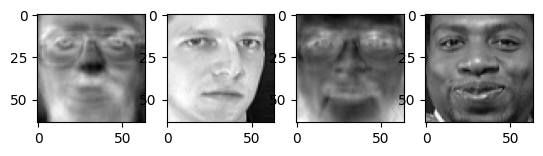

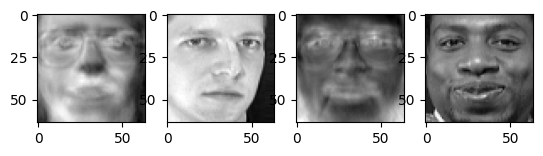

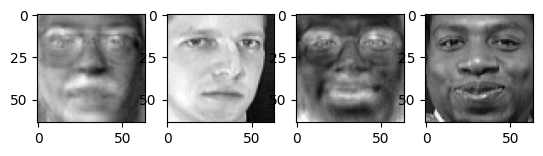

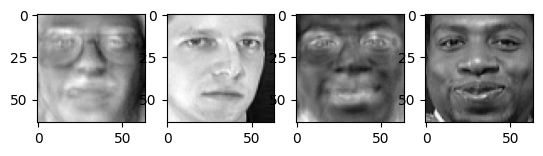

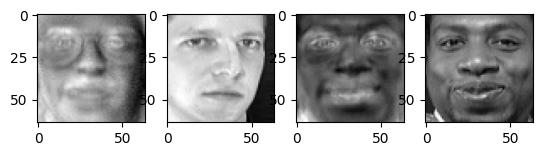

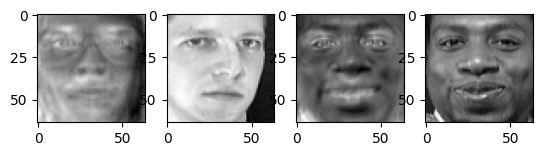

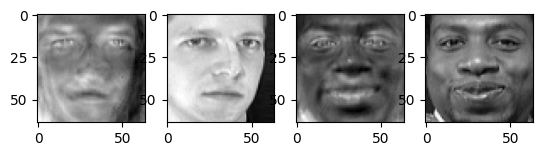

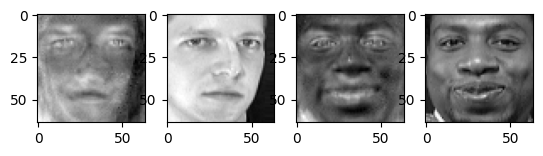

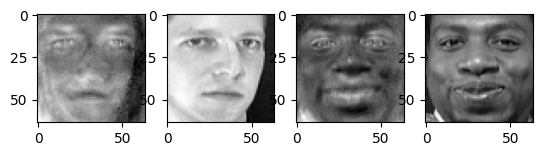

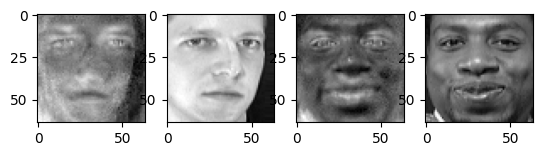

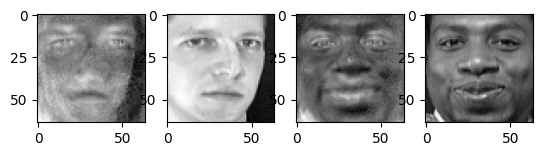

In [52]:

def reconstruct_ks_vector(lda):
    ks = [1, 3, 2, 4, 5, 6, 10, 20, 30, 40, 60,100, 200, 300, 400, 500, 1000, 3500]#]#
    all_k_reconstruct_images = []
    for k in ks:
        project_images =  (lda.X - lda.X.mean(axis=0)) @ lda.v[:,:k]
        # k_sum = project_images.sum(axis=1, keepdims=True)
        # print(k)
        reconstruct_images = (project_images @ lda.v[:,:k].T)#
        # print(np.min(reconstruct_images[211]), np.max(reconstruct_images[211]))
        # print(np.min(reconstruct_images[341]), np.max(reconstruct_images[341]))
        # plt.imshow(lda.v[:,:k].mean(axis=1).reshape(64,64), cmap="gray")
        # plt.show()
        plt.subplot(1,4,1)
        plt.imshow(reconstruct_images[1].reshape(64,64), cmap="gray")#, vmin=0, vmax=1)
        plt.subplot(1,4,2)
        plt.imshow(lda.X[1].reshape(64,64), cmap="gray")
        plt.subplot(1,4,3)
        plt.imshow(reconstruct_images[211].reshape(64,64), cmap="gray")#,vmin=0, vmax=1 )
        plt.subplot(1,4,4)
        plt.imshow (lda.X[211].reshape(64,64), cmap="gray")
        # plt.subplot(1,4,1)
        # plt.imshow(reconstruct_images[42].reshape(64,64), cmap="binary")#, vmin=0, vmax=1)
        # plt.subplot(1,4,2)
        # plt.imshow(lda.X[42].reshape(64,64), cmap="gray")
        # plt.subplot(1,4,3)
        # plt.imshow(reconstruct_images[117].reshape(64,64), cmap="binary")#,vmin=0, vmax=1 )
        # plt.subplot(1,4,4)
        # plt.imshow (lda.X[117].reshape(64,64), cmap="gray")
        plt.show()

reconstruct_ks_vector(lda)

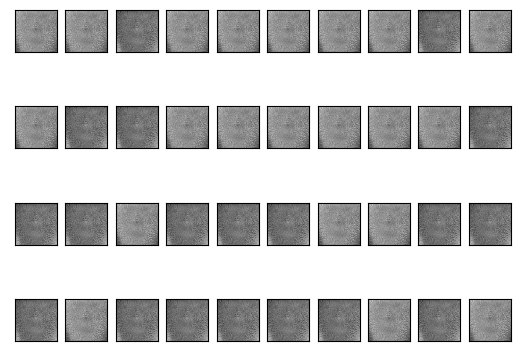

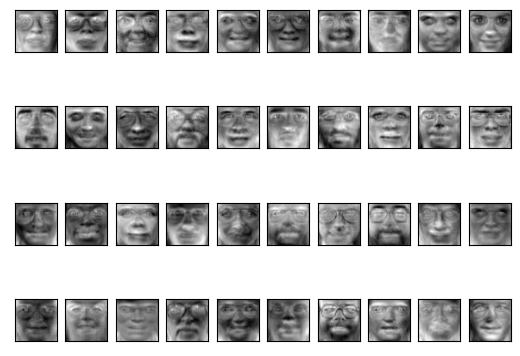

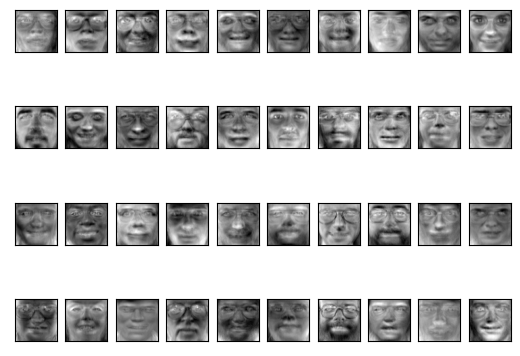

In [53]:
def reconstruct_k_vector(lda):
    ks = [1, 40, 60]
    all_k_reconstruct_images = []
    for k in ks:
        project_images =  (lda.X - lda.X.mean(axis=0)) @ lda.v[:,:k]

        reconstruct_images = (project_images @ lda.v[:,:k].T)#
        for i in range(1,401, 10):
            plt.subplot(4, 10, (i//10)+1)

            plt.imshow(reconstruct_images[i].reshape(64,64), cmap="gray")
            plt.xticks([])
            plt.yticks([])
        plt.show()
reconstruct_k_vector(lda)

In [18]:
lda.w

array([-1.1471074e+05,  1.1069395e+05,  3.1367115e+04, ...,
        3.6802125e-05, -4.5365410e-05,  1.6555535e-04], dtype=float32)

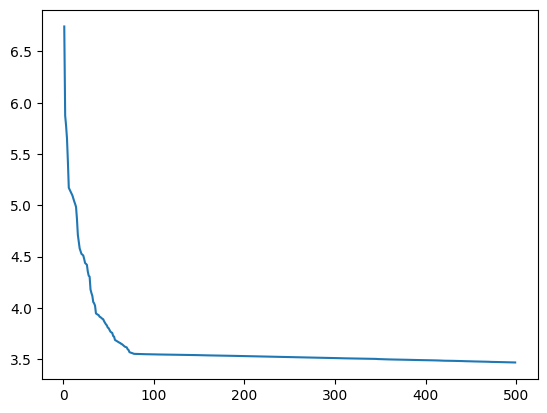

In [54]:
def plot_mse(lda):
    # ks = [i for i in range(1, 1000, 20)]
    ks = [i for i in range(1, 500, 1)]

    mse_error = []
    for k in ks:
        project_images = lda.X @ lda.v[:,:k]
        reconstruct_images = project_images @ lda.v[:,:k].T
        mse_error.append(np.log(((reconstruct_images-lda.X)**2).sum(axis=1).mean()))
    plt.plot(ks, mse_error)
plot_mse(lda)

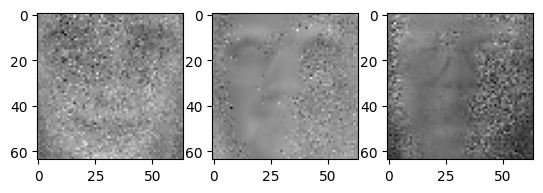

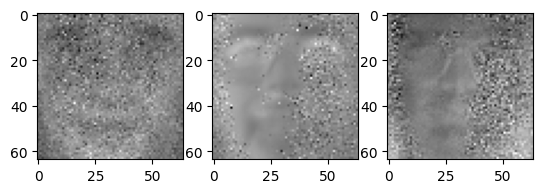

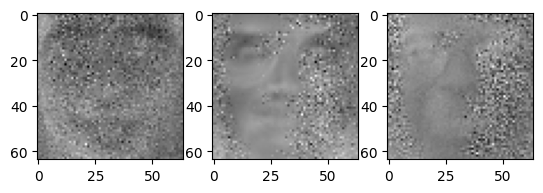

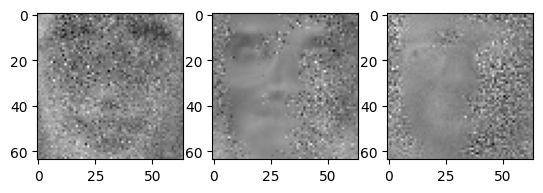

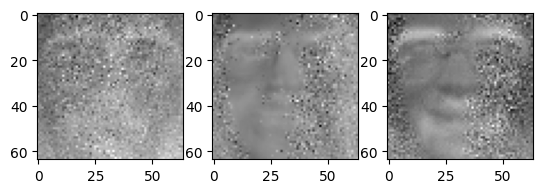

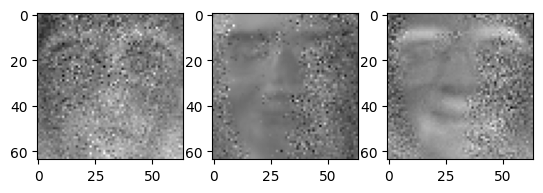

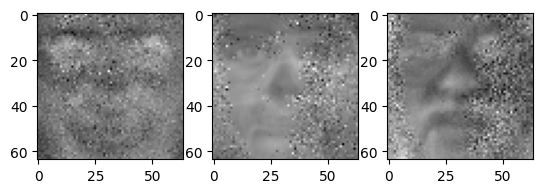

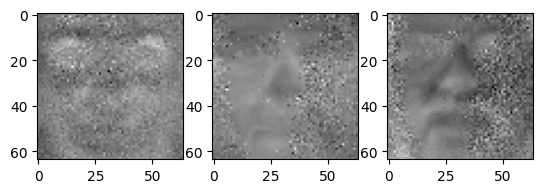

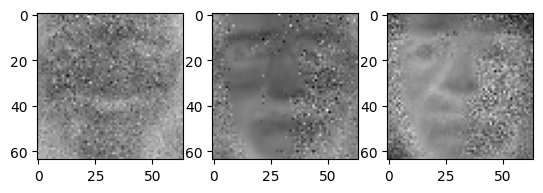

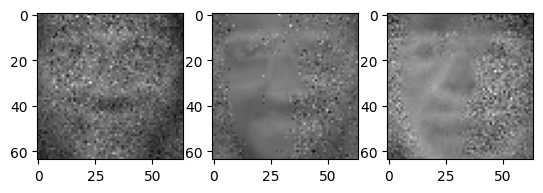

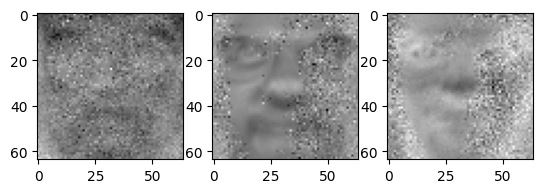

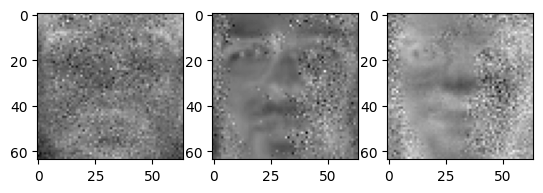

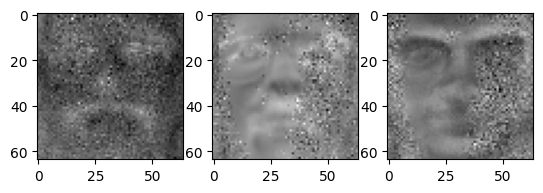

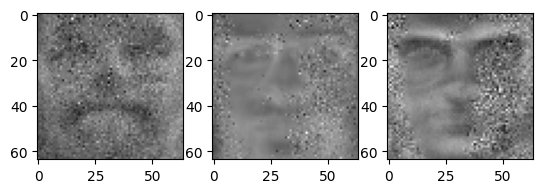

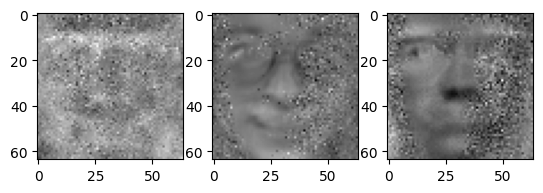

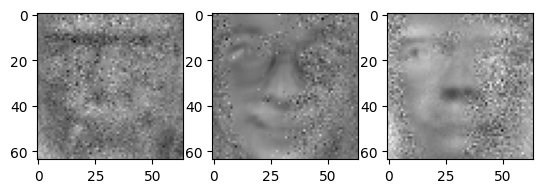

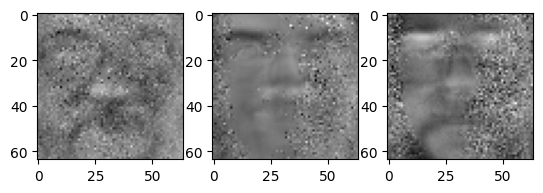

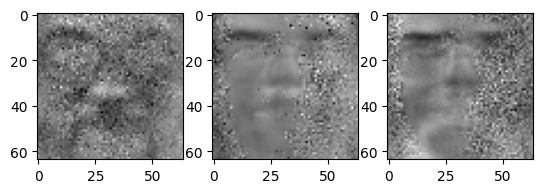

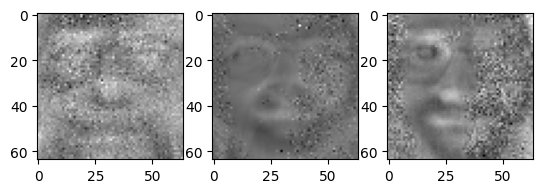

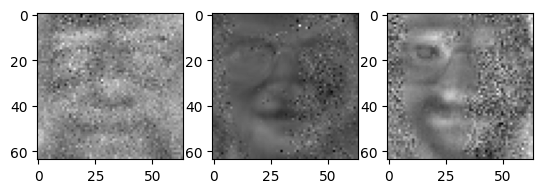

In [7]:
lda.find_andplot_thresholds()

In [21]:
np.linalg.inv(lda.s_w) @ lda.s_b

array([[ -448947.9 ,  -700273.1 ,  -875814.06, ...,  1472331.5 ,
         1044222.8 ,   456713.2 ],
       [-3792617.  , -4622220.  , -2659470.  , ..., -6486537.  ,
        -6687769.  , -6939805.  ],
       [-2899126.2 , -3618453.5 , -3205603.8 , ..., -2067461.5 ,
        -2127643.  , -2093954.  ],
       ...,
       [ -799681.25, -1735687.2 ,  -909350.  , ..., -2238172.  ,
        -2721366.5 , -3921376.5 ],
       [ 1522316.5 ,  2000982.1 ,  1564270.2 , ...,   548777.5 ,
         1328380.  ,  2091815.  ],
       [ 5208172.  ,  5801106.  ,  5464728.  , ..., -3110184.  ,
        -2080681.5 ,  -757224.  ]], dtype=float32)

In [24]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
check_symmetric(np.linalg.inv(lda.s_w) @ lda.s_b)

False

In [ ]:
lda.w, lda.v = lda.w.real, lda.v.real